In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


# Data Exploration

In [27]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
train_df.sample(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
158537,158537,15688846,K'ung,568,France,Male,58.0,7,0.00,2,1.0,0.0,93536.43,0
156495,156495,15762588,Pinto,732,France,Female,39.0,2,121355.93,1,1.0,0.0,65416.38,0
15433,15433,15643618,Hsia,587,France,Male,60.0,9,149947.61,1,1.0,1.0,65902.23,0
68420,68420,15806915,Ts'ai,778,France,Male,35.0,8,0.00,2,1.0,0.0,143387.01,0
77713,77713,15646720,Pagnotto,696,France,Male,42.0,6,0.00,2,1.0,0.0,173840.68,0


In [28]:
test_df = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
test_df.sample(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
32214,197248,15731553,Sagese,527,Germany,Female,43.0,1,133870.07,1,1.0,1.0,180345.44
36764,201798,15622485,Y?an,757,Spain,Male,35.0,4,0.00,2,1.0,1.0,47952.45
57220,222254,15648067,Wright,653,Spain,Female,38.0,3,0.00,1,1.0,0.0,134790.75
76178,241212,15796764,Martin,636,Spain,Female,46.0,10,155973.13,1,1.0,0.0,91423.69
88317,253351,15749669,Gough,581,France,Female,51.0,4,0.00,1,1.0,0.0,176720.98


In [29]:
sample_df = pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")
sample_df.sample(3)

,id,Exited
46467,211501,0.5
42191,207225,0.5
87653,252687,0.5


In [30]:
sample_df.Exited.unique()

array([0.5])

# Data Analysis and Model Building on Training Data

In [31]:
train_df.sample(3)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
148301,148301,15664523,Hughes,587,France,Male,40.0,2,0.00,4,0.0,1.0,106174.70,0
154754,154754,15572073,Nnamutaezinwa,696,France,Male,31.0,10,176099.46,1,1.0,1.0,176680.54,0
20226,20226,15574910,Ferguson,850,France,Male,50.0,2,115625.07,1,1.0,0.0,185855.21,0


# Exploring and Cleaning the Dataset

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In the Training Data we have 165034 rows and 14 columns.

In [33]:
train_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [34]:
# Removing unnecessary columns from the dataset, which has no impact on the dataset 
train_df = train_df.drop(columns = ['id', 'CustomerId', 'Surname'], axis = 1)
train_df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
147035,775,Spain,Male,70.0,7,0.0,2,1.0,1.0,74532.02,0


In [35]:
categorical_columns = train_df.select_dtypes(include = 'O').columns
numerical_columns = train_df.select_dtypes(exclude = 'O').columns

print(f"There are {len(categorical_columns)} categorical columns and {len(numerical_columns)} numerical columns")

There are 2 categorical columns and 9 numerical columns


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
train_df.Geography


0         France
1         France
2         France
3         France
4          Spain
           ...  
165029     Spain
165030    France
165031    France
165032     Spain
165033    France
Name: Geography, Length: 165034, dtype: object

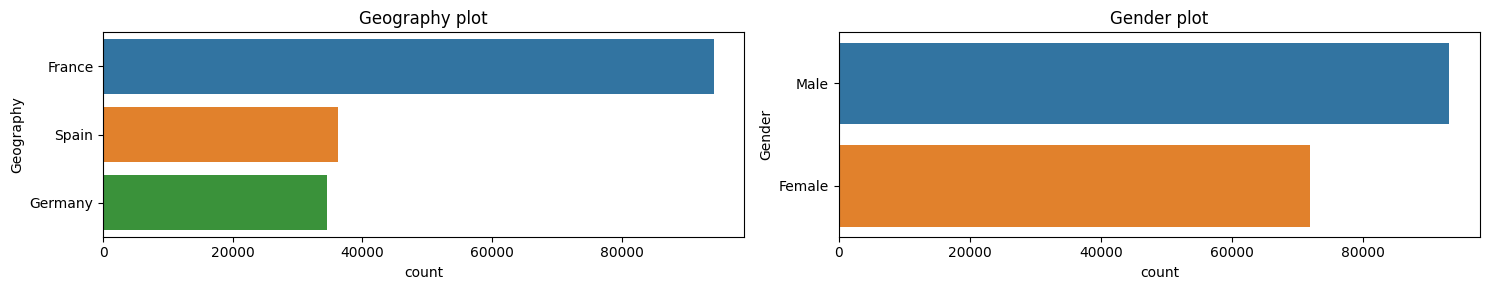

In [38]:
# Categorical Plot
plt.figure(figsize= (15, 3))

def countplot():
    for i in range(len(categorical_columns)):
        plt.subplot(1, 2, i+1)
        sns.countplot(data = train_df, y = categorical_columns[i])
        plt.title(f"{categorical_columns[i]} plot")

    plt.tight_layout()    
    plt.show()

countplot()

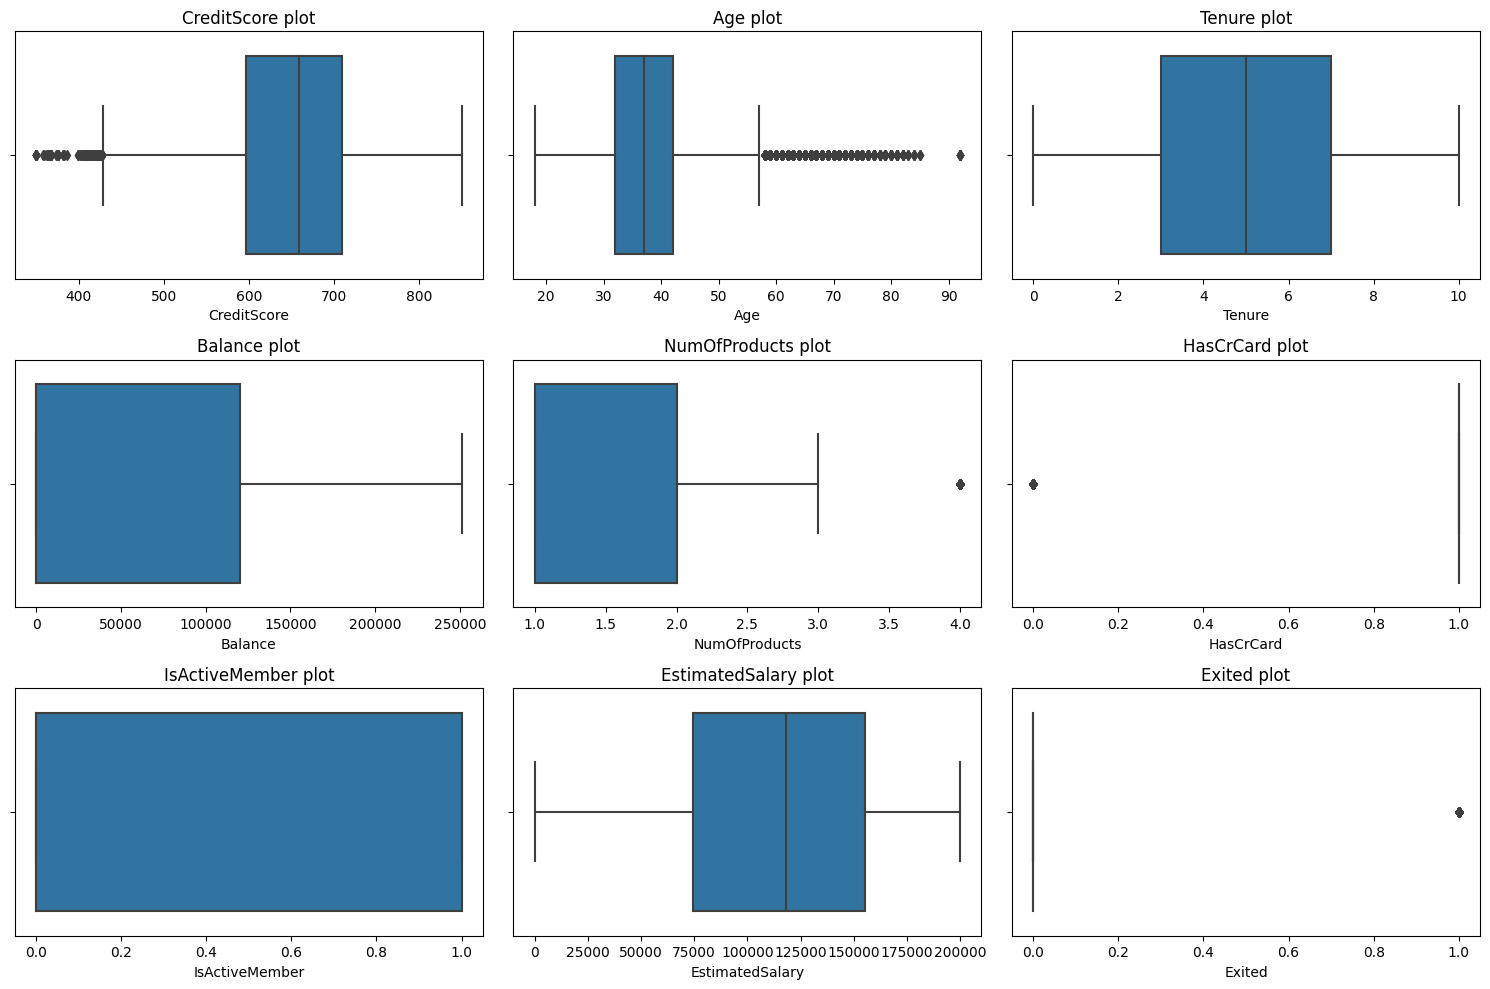

In [39]:
# Numerical Plot

plt.figure(figsize= (15, 10))

def boxplot():
    for i in range(len(numerical_columns)):
        plt.subplot(3, 3, i+1)
        sns.boxplot(data = train_df, x = numerical_columns[i])
        plt.title(f"{numerical_columns[i]} plot")

    plt.tight_layout()    
    plt.show()

boxplot()

In column Age there is outlier above age > 85, and also columns `HasCrCard` and `Exited` are categorical columns

In [40]:
# Removing outliers

train_df = train_df[train_df.Age <= 85]

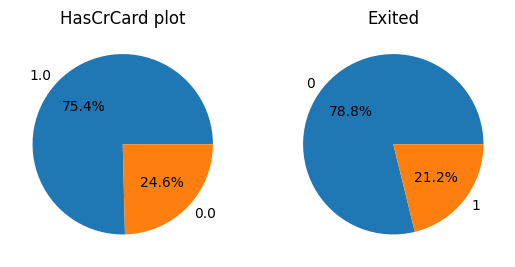

In [41]:
plt.subplot(121)
plt.pie(train_df.HasCrCard.value_counts(), labels = train_df.HasCrCard.value_counts().index, autopct = "%1.1f%%")
plt.title('HasCrCard plot')

plt.subplot(122)
plt.pie(train_df.Exited.value_counts(), labels = train_df.Exited.value_counts().index, autopct = "%1.1f%%")
plt.title('Exited')

plt.show()

In [42]:
train_df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
39053,639,Spain,Male,20.0,5,0.0,1,0.0,1.0,64854.45,0


It can be observed that middle aged people from age 40 to 65 people churn out more

# Train-Test Split and Data Preparation

In [70]:
train_df.Age = train_df.Age.astype(int)
train_df.HasCrCard = train_df.HasCrCard.astype(int)
train_df.IsActiveMember = train_df.IsActiveMember.astype(int)

train_df.Gender = train_df.Gender.replace({'Male': 1, 'Female': 0}) # Male = 1 and Female = 0

from sklearn.model_selection import train_test_split

X = train_df.drop('Exited', axis = 1)
y = train_df.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder(drop = "first")
scaler = StandardScaler()

preprocessing = ColumnTransformer(
    [
        ('OneHotEncoder', ohe, X_train.select_dtypes(include = "O").columns),
        ('StandardScaler', scaler, X_train.select_dtypes(exclude = 'O').columns)
    ]
)

X_train_scaled = preprocessing.fit_transform(X_train)
X_test_scaled = preprocessing.transform(X_test)


In [44]:
X_train_scaled

array([[ 0.        ,  0.        ,  0.24236494, ...,  0.57169987,
        -0.99677836,  1.40052759],
       [ 0.        ,  1.        ,  0.66620651, ...,  0.57169987,
        -0.99677836, -2.13009994],
       [ 0.        ,  0.        ,  0.36702423, ..., -1.74916954,
         1.00323206,  0.42369913],
       ...,
       [ 0.        ,  1.        , -0.68011376, ..., -1.74916954,
        -0.99677836,  0.49626129],
       [ 0.        ,  0.        , -0.05681734, ...,  0.57169987,
        -0.99677836,  0.59562942],
       [ 0.        ,  0.        ,  0.37949016, ...,  0.57169987,
        -0.99677836, -1.67451412]])

# Model Building

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
          "Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(),
          "AdaBoost": AdaBoostClassifier(),
          "Gradient Boost": GradientBoostingClassifier(),
          "XGBoost": XGBClassifier(),
          "KNN": KNeighborsClassifier()
         }

result_list = []
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    ar_score = accuracy_score(y_test, y_pred)
    pre_score = precision_score(y_test, y_pred)
    rec_score = recall_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])

    metrics_dict = {
    'model name': model_name,
    'accuracy score': ar_score,
    'precision score': pre_score,
    'recall score': rec_score,
    'f1-score': f_score,
    'roc_auc_score': roc_score 
    }

    result_list.append(metrics_dict)

metric_df = pd.DataFrame(result_list)
metric_df

,model name,accuracy score,precision score,recall score,f1-score,roc_auc_score
0,Logistic Regression,0.834177,0.692702,0.387647,0.497106,0.817254
1,Decision Tree,0.799303,0.524427,0.544569,0.534308,0.706173
2,Random Forest,0.858567,0.721010,0.539983,0.617502,0.874213
3,AdaBoost,0.862051,0.738634,0.537833,0.622440,0.879650
4,Gradient Boost,0.864687,0.747341,0.543852,0.629562,0.888363
5,XGBoost,0.862536,0.726144,0.561622,0.633374,0.887119
6,KNN,0.845932,0.668087,0.539123,0.596717,0.828021


In [46]:
metric_df.sort_values(by = ['accuracy score', 'roc_auc_score'])

,model name,accuracy score,precision score,recall score,f1-score,roc_auc_score
1,Decision Tree,0.799303,0.524427,0.544569,0.534308,0.706173
0,Logistic Regression,0.834177,0.692702,0.387647,0.497106,0.817254
6,KNN,0.845932,0.668087,0.539123,0.596717,0.828021
2,Random Forest,0.858567,0.721010,0.539983,0.617502,0.874213
3,AdaBoost,0.862051,0.738634,0.537833,0.622440,0.879650
5,XGBoost,0.862536,0.726144,0.561622,0.633374,0.887119
4,Gradient Boost,0.864687,0.747341,0.543852,0.629562,0.888363


**Analysis**

From the above comparison:
- Gradient Boost and XGBoost are the top-performing models across almost all metrics.
- XGBoost shows the highest Recall (0.5616), meaning it is better at catching customers likely to leave.
- Gradient Boost shows the highest Precision (0.7473), meaning it makes fewer false alarms when predicting churn.
- Both have nearly identical Accuracy and ROC-AUC, indicating strong overall performance.


In this bank churn problem, Recall is the priority — missing a true churner (false negative) is more costly because it means losing a customer who could have been retained with an outreach or retention offer.

XGBoost’s superior recall (0.5616 vs Gradient Boost’s 0.5439) means it catches more of those at-risk customers. 

Although Gradient Boost has slightly better precision and ROC-AUC, the business objective (minimize missed churners) favors XGBoost.

**Conclusion** - As the performance of both the models are very close to each other, so Hyper Parameter Tuning will be done in both the model and depending upon the metrics the final model will be selected.

# Hyper Parameter Tuning of XGBoost and Gradient Boost

In [47]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv = StratifiedKFold(5)

gridcv_models = [
    ("Gradient Boost Classifier", GradientBoostingClassifier(), gb_params),
    ("XGB Classifier", XGBClassifier(), xgb_params)
]


for model_name, model, params in gridcv_models:
    gridcv = GridSearchCV(estimator= model, cv = cv, scoring = 'roc_auc', verbose= 1, n_jobs = -1, param_grid= params)
    gridcv.fit(X_train_scaled, y_train)
    
    print(f"---------------{model_name}---------------")
    print(gridcv.best_params_)
    print(gridcv.best_estimator_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
---------------Gradient Boost Classifier---------------
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=200,
                           subsample=0.8)
Fitting 5 folds for each of 32 candidates, totalling 160 fits
---------------XGB Classifier---------------
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_one

In [54]:
hyper_param_tuned_models = {
    "Gradient Boost Classifier": GradientBoostingClassifier(learning_rate = 0.05, max_depth = 5, n_estimators = 200, subsample = 0.8),
    "XG Boost Classifier": XGBClassifier(colsample_bytree = 1, learning_rate = 0.05, max_depth = 5, n_estimators = 200, subsample = 0.7)
}

result_list = []
for model_name, model in hyper_param_tuned_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    ar_score = accuracy_score(y_test, y_pred)
    pre_score = precision_score(y_test, y_pred)
    rec_score = recall_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])

    hyper_param_metrics_dict = {
    'model name': model_name,
    'accuracy score': ar_score,
    'precision score': pre_score,
    'recall score': rec_score,
    'f1-score': f_score,
    'roc_auc_score': roc_score 
    }

    result_list.append(hyper_param_metrics_dict)

hyper_param_metrics_dict = pd.DataFrame(result_list)
hyper_param_metrics_dict

,model name,accuracy score,precision score,recall score,f1-score,roc_auc_score
0,Gradient Boost Classifier,0.866020,0.738968,0.566351,0.641246,0.889889
1,XG Boost Classifier,0.866323,0.739455,0.567784,0.642348,0.889876


**Analysis**
- Both models are extremely close across all metrics.
- XGBoost has a slight higher Recall and F1-Score, which is important in churn prediction because we want to catch as many at-risk customers as possible.
- Precision is almost identical for both the models, and ROC-AUC is nearly the same.

**Conclusion** : XGBoost Classifier Model will be selected because - 
- In a bank churn problem, Recall is the priority — missing a true churner is costlier than giving a false alarm.
- XGBoost’s tiny edge in Recall and F1-Score makes it the better choice for your final model.
- The difference is small, so either model would perform well, but choosing XGBoost aligns with the business objective of minimizing missed churners.

# Predictions on Test Data

In [55]:
test_df.sample(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
16421,181455,15783029,Chiang,656,Germany,Female,38.0,8,123086.39,2,1.0,0.0,55868.97
74576,239610,15773017,Todd,545,Spain,Male,33.0,3,0.00,1,1.0,1.0,149705.25
49855,214889,15757588,H?,651,Germany,Female,41.0,3,161450.03,2,1.0,0.0,147955.91
101695,266729,15627995,Angelo,690,Germany,Male,36.0,7,155143.52,1,0.0,0.0,135034.57
86817,251851,15696852,Hsu,682,Spain,Female,32.0,9,192122.84,2,1.0,1.0,54277.45


In [57]:
test_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [80]:
# Dropping unnecessary columns
test_df_copy = test_df.drop(['id','Surname', 'CustomerId'], axis = 1 )

# Data Preprocessing
test_df_copy.Gender = test_df_copy.Gender.replace({"Male": 1, "Female": 0}) 
test_df_copy.Age = train_df.Age.astype(int)
test_df_copy.HasCrCard = train_df.HasCrCard.astype(int)
test_df_copy.IsActiveMember = train_df.IsActiveMember.astype(int)
test_df_scaled = preprocessing.transform(test_df_copy)

# Model Prediction
model = XGBClassifier(colsample_bytree = 1, learning_rate = 0.05, max_depth = 5, n_estimators = 200, subsample = 0.7)
model.fit(X_train_scaled, y_train)
predictions = model.predict_proba(test_df_scaled)
predictions


/tmp/ipykernel_36/3708577504.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df_copy.Gender = test_df_copy.Gender.replace({"Male": 1, "Female": 0})


array([[0.9634304 , 0.03656959],
       [0.85524213, 0.1447579 ],
       [0.916011  , 0.08398902],
       ...,
       [0.98924345, 0.01075652],
       [0.6765189 , 0.32348105],
       [0.24781376, 0.75218624]], dtype=float32)

# Submission

In [86]:
submission = pd.DataFrame({"id": test_df.id,"Exited": predictions[:, 1]})
submission.head()

,id,Exited
0,165034,0.036570
1,165035,0.144758
2,165036,0.083989
3,165037,0.070148
4,165038,0.107413


In [87]:
submission.to_csv("submission.csv", index = False)
print("Submission saved!")

Submission saved!
